In [4]:
# import zipfile
# with zipfile.ZipFile("santander-customer-transaction-prediction.zip", 'r') as zip_ref:
#     zip_ref.extractall(".")

In [1]:
64 * 13 * 13

10816

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 

In [12]:
df = pd.read_csv('train.csv')
df.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [14]:
df.drop('ID_code', axis=1, inplace=True)

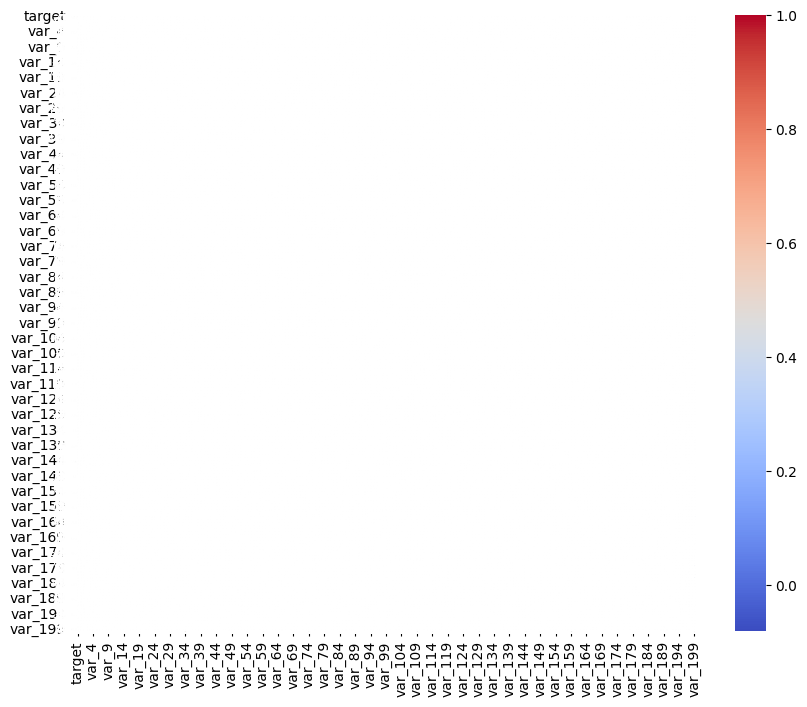

In [20]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

In [34]:
corr = df.corr()

In [33]:
corr['target'][corr['target'] > 0.7]

target    1.0
Name: target, dtype: float64

Минни вывод:
Целевая переменная не с одним из признаков не коррелирует 

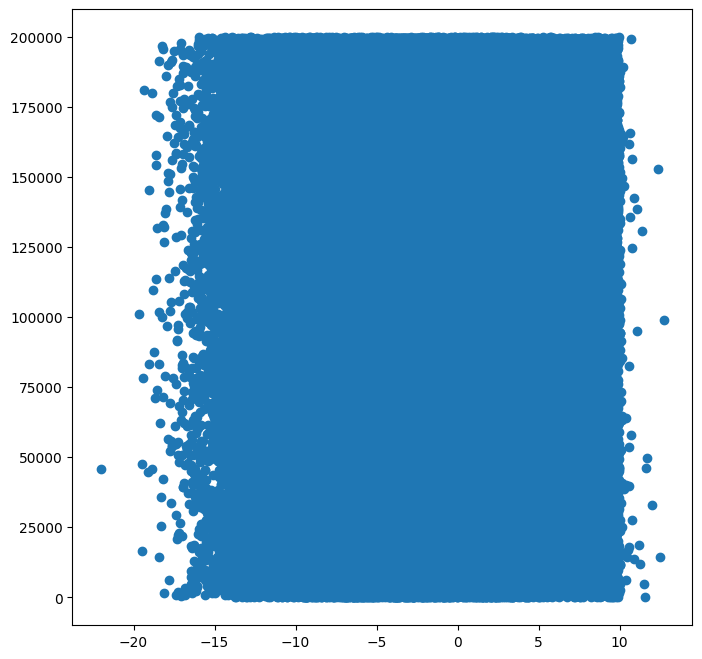

In [43]:
plt.figure(figsize=(8, 8))
plt.scatter(df['var_180'], df.index)

мини вывод 2: данные все нужны

## Шаг 2. Обработка данных 

In [63]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, r2_score

In [46]:

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [54]:
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [72]:
scaler.transform(X_train)
scaler.transform(X_test)


array([[0.53121004, 0.41466236, 0.4202661 , ..., 0.46821664, 0.53725333,
        0.71809155],
       [0.62402453, 0.34848664, 0.28804354, ..., 0.62122027, 0.42391549,
        0.52926335],
       [0.64091088, 0.55896492, 0.6865316 , ..., 0.43589571, 0.72498514,
        0.50362723],
       ...,
       [0.58458278, 0.87993013, 0.46559419, ..., 0.39796398, 0.57133563,
        0.22266475],
       [0.58675776, 0.32406511, 0.44250378, ..., 0.17242306, 0.44921723,
        0.5714615 ],
       [0.63093212, 0.64739066, 0.37216813, ..., 0.4658648 , 0.30074691,
        0.66779691]])

In [85]:
model = LogisticRegression()
model.fit(X_train, y_train)

roc_auc = roc_auc_score(y_test, model.predict(X_test))
print("ROC-AUC на тестовых данных: ", roc_auc)

ROC-AUC на тестовых данных:  0.6117237111463903


c:\Users\razum\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [80]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, roc_auc_score

# Создаем экземпляр модели логистической регрессии
model = LogisticRegression()

# Определяем параметры для перебора
param_grid = {
    'C': [0.1, 1, 10, 100],  # Регуляризация
    'solver': ['newton-cg', 'сага', 'lbfgs', 'liblinear'],  # Алгоритмы оптимизации
    'max_iter': [20]  # Количество итераций
}

# Определяем метрику для оптимизации
scorer = make_scorer(roc_auc_score, needs_proba=True)

# Создаем экземпляр GridSearchCV
grid_search = GridSearchCV(model, param_grid, scoring=scorer, cv=5)

# Обучаем модель с подбором гиперпараметров
grid_search.fit(X_train, y_train)

# Выводим лучшие параметры
print("Лучшие параметры: ", grid_search.best_params_)

c:\Users\razum\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
c:\Users\razum\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
c:\Users\razum\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
c:\Users\razum\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
c:\Users\razum\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iter

Лучшие параметры:  {'C': 10, 'max_iter': 20, 'solver': 'liblinear'}


c:\Users\razum\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [81]:
# Получаем лучшую модель
best_model = grid_search.best_estimator_

# Оцениваем модель на тестовых данных
roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])
print("ROC-AUC на тестовых данных: ", roc_auc)

ROC-AUC на тестовых данных:  0.857708053603978


In [83]:
best_model

LogisticRegression(C=10, max_iter=20, solver='liblinear')

In [86]:
# Количество комбинаций параметров, которые были просчитаны
n_combinations = len(grid_search.cv_results_['params'])
print("Количество просчитанных моделей: ", n_combinations)


Количество просчитанных моделей:  16


In [88]:
# make submission
df_test = pd.read_csv('test.csv')
submission = pd.DataFrame()
submission['ID_code'] = df_test['ID_code']
df_test.drop('ID_code', axis=1, inplace=True)
submission['target'] = best_model.predict(df_test)
submission.head()

,ID_code,target
0,test_0,0
1,test_1,0
2,test_2,0
3,test_3,0
4,test_4,0


In [91]:
pd.read_csv('sample_submission.csv').head()

,ID_code,target
0,test_0,0
1,test_1,0
2,test_2,0
3,test_3,0
4,test_4,0


In [92]:
submission.to_csv('submission_1.csv', index=False)

## Решение CatBoost

In [97]:
from catboost import CatBoostClassifier
import pandas as pd
import numpy as np
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import make_scorer, roc_auc_score
from tqdm import tqdm
from sklearn.model_selection import ParameterGrid
from sklearn.base import clone

In [98]:
# Создание модели CatBoost
model = CatBoostClassifier(silent=True)

# Определение параметров для сеточного поиска
param_grid = {
    'iterations': [10, 40],
    'depth': [4, 8, 16],  # Обновленный диапазон глубины дерева
    'learning_rate': [0.01, 0.05, 0.1],
    'l2_leaf_reg': [1, 3, 5]
}

# Определяем метрику для оптимизации
scorer = make_scorer(roc_auc_score, needs_proba=True)

# Выполнение сеточного поиска с прогресс-баром
param_combinations = list(ParameterGrid(param_grid))
results = []

# Прогресс-бар
for params in tqdm(param_combinations, desc="Grid Search Progress"):
    try:
        model_clone = clone(model).set_params(**params)
        model_clone.fit(X_train, y_train)
        y_pred_proba = model_clone.predict_proba(X_test)[:, 1]
        score = roc_auc_score(y_test, y_pred_proba)
        results.append((params, score))
    except Exception as e:
        print(f"Параметры {params} вызвали ошибку: {e}")
        results.append((params, np.nan))

# Находим лучшие параметры и соответствующий результат
best_params, best_score = max(results, key=lambda x: x[1] if not np.isnan(x[1]) else -np.inf)

print("Лучшие параметры: ", best_params)
print("Лучший ROC-AUC: ", best_score)

Grid Search Progress: 100%|██████████| 54/54 [3:08:57<00:00, 209.95s/it]  

Лучшие параметры:  {'depth': 8, 'iterations': 40, 'l2_leaf_reg': 5, 'learning_rate': 0.1}
Лучший ROC-AUC:  0.8288256138427397


In [96]:
best_model

In [99]:
# Оцениваем модель на тестовых данных
roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])
print("ROC-AUC на тестовых данных: ", roc_auc)

ROC-AUC на тестовых данных:  0.8336875917038414


In [100]:
submission['target'] = best_model.predict(df_test)
submission.to_csv('submission_2.csv', index=False)

## Модель 3

In [105]:
model_3 = CatBoostClassifier(silent=True, l2_leaf_reg=5, learning_rate=0.1, depth=8, iterations=100)
model_3.fit(X_train, y_train)
roc_auc = roc_auc_score(y_test, model_3.predict_proba(X_test)[:, 1])
print("ROC-AUC на тестовых данных: ", roc_auc)

ROC-AUC на тестовых данных:  0.8615579074339055


In [106]:
submission['target'] = model_3.predict(df_test)
submission.to_csv('submission_4.csv', index=False)